# Shoe Classification Using CNNs

AIM: The aim of the project is to biuld a model using Convolutional Neural Networks, which correctly classifies images of mens shoes according to their type. The model will be constructed using Keras with TensorFlow as the backend.

In [41]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Convolution2D, Flatten, MaxPooling2D, Dropout
import os
import numpy as np
from scipy import misc
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import np_utils
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from keras.models import model_from_json
from sklearn.metrics import confusion_matrix,accuracy_score
import itertools
import matplotlib.pyplot as plt
from PIL import Image

#### Model Architecture

In [4]:
# load json and create model
json_file = open('Results/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("Results/model.h5")
print("Loaded model from disk")

Loaded model from disk


In [5]:
X=np.load('X_Data.npy')
y=np.load('y_Data.npy')

X=X.astype("float32")

Enc=LabelEncoder()
y= Enc.fit_transform(y)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [6]:
Classes=np.load('Results/Class_List.npy')

In [45]:
Classes

array(['boots', 'chelsea', 'formal', 'hightops', 'loafers', 'monk',
       'sandals', 'sneakers'], dtype=object)

In [10]:
y_pred=loaded_model.predict_classes(X_test)

2748/2748 [==============================] - 105s   


In [14]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred)

In [19]:
rows = sum(cnf_matrix)

In [25]:
percentage = ((cnf_matrix / rows.astype(np.float))*100).round()

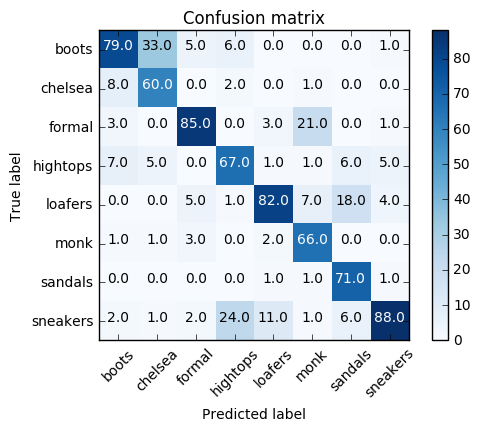

In [26]:
plot_confusion_matrix(percentage, classes= Classes)

In [28]:
accuracy_score(y_test,y_pred)

0.81768558951965065

In [31]:
loaded_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
score=loaded_model.evaluate(X_test,keras.utils.np_utils.to_categorical(y_test))

2748/2748 [==============================] - 111s   


In [32]:
print score

[0.2890568959487404, 0.95524017467248912]


In [33]:
loaded_model.metrics_names

['loss', 'acc']

In [34]:
y_pred2=loaded_model.predict_classes(X_test)

2748/2748 [==============================] - 114s   


In [35]:
accuracy_score(y_test,y_pred2)

0.81768558951965065

Predict 2 Test Shoes

In [42]:
Array_List=[]
Test_List=['Test_1.jpg','Test_2.jpg']
for x in Test_List:
    im=Image.open(x)
    ar = misc.fromimage(im)
    Array_List.append(ar)

In [43]:
X=np.array(Array_List)

In [44]:
loaded_model.predict_classes(X)

2/2 [==============================] - 0s


array([7, 7])

In [52]:
y_test[1]

3

In [51]:
y_test==y_pred

array([ True, False,  True, ...,  True,  True,  True], dtype=bool)

In [53]:
y_pred[1]

7

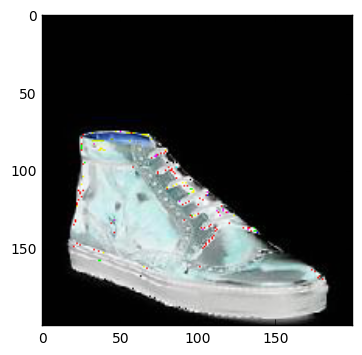

In [57]:
plt.imshow(X_test[1])
plt.show()

In [59]:
Probabilities=loaded_model.predict_proba(X_test)

2748/2748 [==============================] - 120s   
